<a href="https://colab.research.google.com/github/amanjain487/panoptic-segmentation-using-DETR/blob/main/Train_Bounding_Box_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Model for Object Detection

## Get CUDA Device Properties

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image
print(torch.cuda.get_device_properties(0))


_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Mount Drive
- To continue training from last checkpoint
- To save model after every epoch

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Install Required Libraries/Packages

In [ ]:
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-era6617y
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-era6617y
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=97cd603cb1ba09598f53d57321b178c68be308c3cd3675fca91b90033801401e
  Stored in directory: /tmp/pip-ephem-wheel-cache-uu8mr7z2/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

# Train Box Model

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

!python main.py --coco_path ../data/  --coco_panoptic_path ../data/ --dataset_file coco_panoptic --output_dir "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model"  --epoch 150 --batch_size 2 --resume "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model/checkpoint.pth"

Streaming output truncated to the last 5000 lines.
Epoch: [142]  [ 250/5065]  eta: 0:20:00  lr: 0.000100  class_error: 0.00  loss: 4.7879 (5.7433)  loss_ce: 0.3118 (0.3895)  loss_bbox: 0.2240 (0.2905)  loss_giou: 0.1675 (0.2368)  loss_ce_0: 0.3423 (0.4497)  loss_bbox_0: 0.2873 (0.3356)  loss_giou_0: 0.2117 (0.2664)  loss_ce_1: 0.2797 (0.4275)  loss_bbox_1: 0.2489 (0.3053)  loss_giou_1: 0.1998 (0.2494)  loss_ce_2: 0.3129 (0.4161)  loss_bbox_2: 0.2814 (0.2929)  loss_giou_2: 0.1995 (0.2388)  loss_ce_3: 0.2348 (0.3912)  loss_bbox_3: 0.2334 (0.2930)  loss_giou_3: 0.1928 (0.2395)  loss_ce_4: 0.3370 (0.3977)  loss_bbox_4: 0.2168 (0.2876)  loss_giou_4: 0.1702 (0.2358)  loss_ce_unscaled: 0.3118 (0.3895)  class_error_unscaled: 11.1111 (13.2391)  loss_bbox_unscaled: 0.0448 (0.0581)  loss_giou_unscaled: 0.0837 (0.1184)  cardinality_error_unscaled: 3.0000 (2.3546)  loss_ce_0_unscaled: 0.3423 (0.4497)  loss_bbox_0_unscaled: 0.0575 (0.0671)  loss_giou_0_unscaled: 0.1058 (0.1332)  cardinality_error_0_

In [ ]:
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('output/box_model/')]

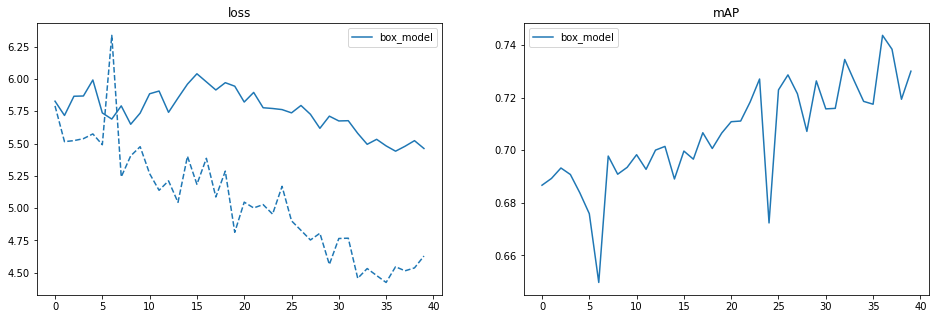

In [ ]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

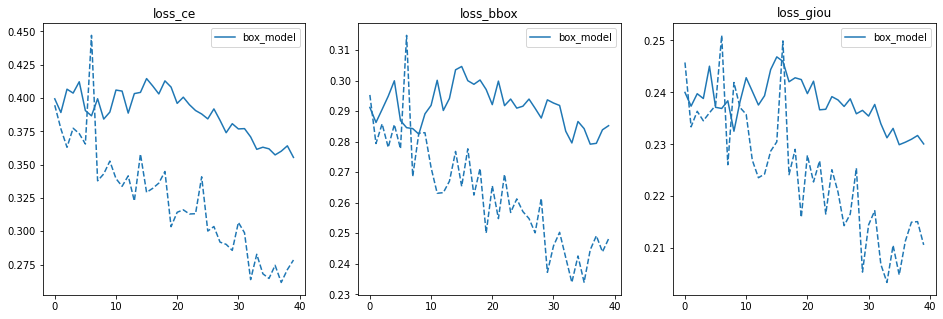

In [ ]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )
 
plot_logs(log_directory,
          fields_of_interest)

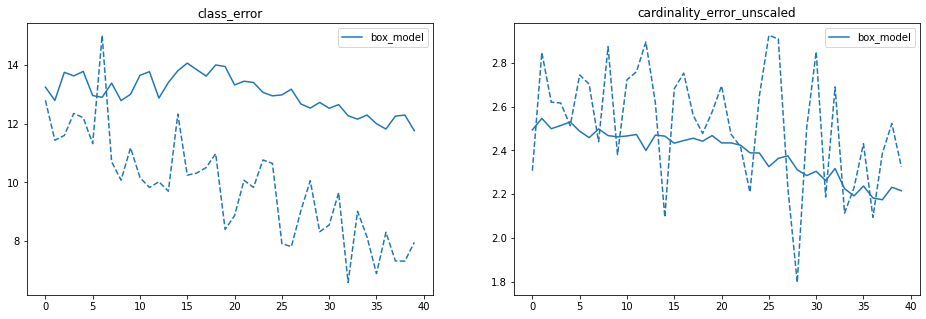

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   